In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Linear Regression Single Variable

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


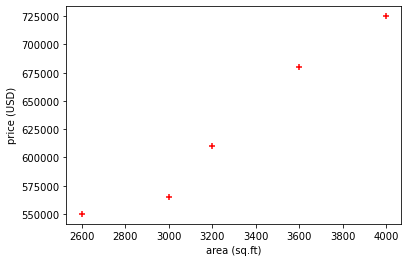

In [3]:
%matplotlib inline
plt.xlabel('area (sq.ft)')
plt.ylabel('price (USD)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.show()

In [4]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [7]:
reg.predict([[3300]])           #predict a price for area = 3300

array([628715.75342466])

In [8]:
reg.coef_                # m = slope(gradient)

array([135.78767123])

In [9]:
reg.intercept_          # c = intercept

180616.43835616432

In [10]:
# y = mx + c
# price = m * area + c
x = 3300
y = reg.coef_*x + reg.intercept_
print(y)

[628715.75342466]


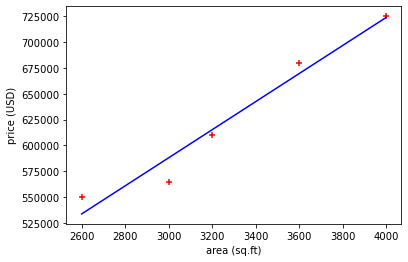

In [11]:
%matplotlib inline
plt.xlabel('area (sq.ft)')
plt.ylabel('price (USD)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.plot(df.area, reg.predict(df[['area']]), color = 'blue')
plt.show()

In [12]:
reg.predict([[5000]])          #predict a proce for area = 5000

array([859554.79452055])

In [13]:
# Generate CSV file with list of home price predictions

In [14]:
d = pd.read_csv('areas.csv')
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [15]:
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
p = reg.predict(d)
d['prices'] = p
d.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [17]:
d.to_csv("areas_prediction.csv", index = False)

In [18]:
# Exercise
# Predict canada's per capita income in year 2020. 
# There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. 
# Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [19]:
dt = pd.read_csv("canada_per_capita_income.csv")
dt.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [20]:
new_dt = dt.drop('per capita income (US$)',axis='columns')
new_dt.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [21]:
income = dt['per capita income (US$)']
income.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [22]:
reg = linear_model.LinearRegression()
reg.fit(new_dt, income)

LinearRegression()

In [23]:
reg.predict([[2020]])          # predict the per capita income fo canadian citizens in year 2020

array([41288.69409442])

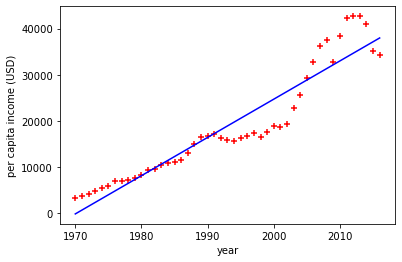

In [24]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (USD)')
plt.scatter(dt.year, dt['per capita income (US$)'], color = 'red', marker = '+')
plt.plot(dt.year, reg.predict(dt[['year']]), color = 'blue')
plt.show()

## Linear Regression Multiple Variables

In [25]:
df = pd.read_csv('homeprices_multi.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [26]:
# handling NA values
# taking the median as safe assumption
median_bedrooms = df.bedrooms.median()      # median = 4.0
df.bedrooms.fillna(median_bedrooms)

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [27]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [28]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [29]:
reg.coef_      # coefficients = {m1, m2, m3}

array([  112.06244194, 23388.88007794, -3231.71790863])

In [30]:
reg.intercept_    # intercept = c

221323.00186540408

In [31]:
reg.predict([[3000, 3, 40]])        # predicts price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

array([498408.25158031])

In [32]:
# y = m1.x1 + m2.x2 + m3.x3 + c
# price = m1.area + m2.bedrooms + m3.age + c

price = 112.06244194*3000 + 23388.88007794*3 + (-3231.71790863)*40 + 221323.00186540408
print(price)

498408.2515740241


In [33]:
reg.predict([[2500, 4, 5]])           # predicts price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

array([578876.03748933])

In [34]:
# Exercise
# In exercise folder (same level as this notebook on github) there is hiring.csv. 
# This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. 
# Based on these 3 factors, HR will decide the salary. 
# Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. 
# Using this predict salaries for following candidates,

# 2 yr experience, 9 test score, 6 interview score
# 12 yr experience, 10 test score, 10 interview score

In [35]:
data = pd.read_csv('hiring.csv')
data

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,450000
2,five,6.0,7,600000
3,two,10.0,10,650000
4,seven,9.0,6,700000
5,three,7.0,10,620000
6,ten,NaN,7,720000
7,eleven,7.0,8,800000


In [36]:
data.experience = data.experience.fillna('zero')
data.test_score = data.test_score.fillna(data.test_score.median())
data

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,450000
2,five,6.0,7,600000
3,two,10.0,10,650000
4,seven,9.0,6,700000
5,three,7.0,10,620000
6,ten,8.0,7,720000
7,eleven,7.0,8,800000


In [37]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [38]:
from word2number import w2n
arr = []
for i in data.experience:
    arr.append(w2n.word_to_num(i))
data.experience = arr
data

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,450000
2,5,6.0,7,600000
3,2,10.0,10,650000
4,7,9.0,6,700000
5,3,7.0,10,620000
6,10,8.0,7,720000
7,11,7.0,8,800000


In [39]:
reg = linear_model.LinearRegression()
reg.fit(data[['experience', 'test_score', 'interview_score']], data.salary)

LinearRegression()

In [40]:
reg.predict([[2, 9, 6]])      # 2 yr experience, 9 test score, 6 interview score

array([473509.65991796])

In [41]:
reg.predict([[12, 10, 10]])      # 12 yr experience, 10 test score, 10 interview score

array([962791.78245335])

## Gradient Descent and Cost Function

In [42]:
def gradient_descent(x,y):
    m_curr = c_curr = 0             # y = mx + c
    iterations = 10000
    n = len(x)
    learning_rate = 0.08
    
    for i in range(iterations):
        y_predicted = m_curr * x + c_curr
        cost = (1/n)*sum([val**2 for val in (y - y_predicted)])
        md = -(2/n)*sum(x*(y - y_predicted))
        cd = -(2/n)*sum(y - y_predicted)
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd
        print("m {}, c {}, cost {}, iteration {}".format(m_curr,c_curr,cost,i))


In [43]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_descent(x,y)

m 4.96, c 1.44, cost 89.0, iteration 0
m 0.4991999999999983, c 0.26879999999999993, cost 71.10560000000002, iteration 1
m 4.451584000000002, c 1.426176000000001, cost 56.8297702400001, iteration 2
m 0.892231679999997, c 0.5012275199999995, cost 45.43965675929613, iteration 3
m 4.041314713600002, c 1.432759910400001, cost 36.35088701894832, iteration 4
m 1.2008760606719973, c 0.7036872622079998, cost 29.097483330142282, iteration 5
m 3.7095643080294423, c 1.4546767911321612, cost 23.307872849944438, iteration 6
m 1.4424862661541864, c 0.881337636696883, cost 18.685758762535738, iteration 7
m 3.4406683721083144, c 1.4879302070713722, cost 14.994867596913156, iteration 8
m 1.6308855378034224, c 1.0383405553279617, cost 12.046787238456794, iteration 9
m 3.2221235247119777, c 1.5293810083298451, cost 9.691269350698109, iteration 10
m 1.7770832372205707, c 1.1780607551353204, cost 7.8084968312098315, iteration 11
m 3.0439475772474127, c 1.5765710804477953, cost 6.302918117062937, iteration 1

m 2.0000000475949777, c 2.999999828167028, cost 5.6773156379782865e-15, iteration 597
m 2.000000046307644, c 2.9999998328147144, cost 5.374352306836484e-15, iteration 598
m 2.000000045055128, c 2.999999837336691, cost 5.087556441739989e-15, iteration 599
m 2.000000043836491, c 2.9999998417363587, cost 4.816065007297071e-15, iteration 600
m 2.0000000426508153, c 2.9999998460170256, cost 4.559061356881592e-15, iteration 601
m 2.000000041497208, c 2.99999985018191, cost 4.315772508974082e-15, iteration 602
m 2.0000000403748053, c 2.9999998542341446, cost 4.085466383551531e-15, iteration 603
m 2.000000039282759, c 2.999999858176775, cost 3.867450373130623e-15, iteration 604
m 2.0000000382202514, c 2.999999862012767, cost 3.661068450675061e-15, iteration 605
m 2.0000000371864806, c 2.9999998657450035, cost 3.4656998931722005e-15, iteration 606
m 2.000000036180673, c 2.999999869376292, cost 3.280756905790774e-15, iteration 607
m 2.000000035202068, c 2.9999998729093624, cost 3.105683186471568

m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1668
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1669
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1670
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1671
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1672
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1673
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1674
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1675
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1676
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1677
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1678
m 2.000000000000002, c 2.999999999999995, cost 1

m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1824
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1825
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1826
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1827
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1828
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1829
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1830
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1831
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1832
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 1833
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 1834
m 2.000000000000002, c 2.999999999999995, cost 1

m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 3167
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 3168
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 3169
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 3170
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 3171
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 3172
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 3173
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 3174
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 3175
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 3176
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 3177
m 2.000000000000001, c 2.9999999999999947, cost 1

m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 4539
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 4540
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 4541
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 4542
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 4543
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 4544
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 4545
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 4546
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 4547
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 4548
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 4549
m 2.000000000000001, c 2.9999999999999947, cost 1

m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 5984
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 5985
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 5986
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 5987
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 5988
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 5989
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 5990
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 5991
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 5992
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 5993
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 5994
m 2.000000000000002, c 2.999999999999995, cost 1

m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 7333
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 7334
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 7335
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 7336
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 7337
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 7338
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 7339
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 7340
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 7341
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 7342
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 7343
m 2.000000000000001, c 2.9999999999999947, cost 1

m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 8844
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 8845
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 8846
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 8847
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 8848
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 8849
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 8850
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 8851
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 8852
m 2.000000000000002, c 2.999999999999995, cost 1.0255191767873153e-29, iteration 8853
m 2.000000000000001, c 2.9999999999999947, cost 1.0255191767873153e-29, iteration 8854
m 2.000000000000002, c 2.999999999999995, cost 1

## Save Model Using Joblib And Pickle

In [44]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [45]:
df = pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [46]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)

LinearRegression()

In [47]:
model.coef_

array([135.78767123])

In [48]:
model.intercept_

180616.43835616432

In [49]:
model.predict([[5000]])

array([859554.79452055])

In [50]:
# Saving Trained Model using pickle

import pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(model,f)

In [51]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [52]:
mp.predict([[5000]])      # using my saved model for prediction

array([859554.79452055])

In [53]:
# Saving Trained Model using joblib
# use joblib in case of large numpy arrays

import joblib
joblib.dump(model, 'model_joblib')

['model_joblib']

In [54]:
mj = joblib.load('model_joblib')
mj.predict([[5000]])

array([859554.79452055])

In [55]:
mj.coef_

array([135.78767123])

## Dummy Variables & One Hot Encoding

In [56]:
import pandas as pd
df = pd.read_csv('homeprices_dummy.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [57]:
# Creating dummy variables
pd.get_dummies(df.town)

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [58]:
dummy = pd.get_dummies(df.town)
merged = pd.concat([df, dummy], axis = 'columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [59]:
final = merged.drop(['town', 'west windsor'], axis = 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [61]:
X = final.drop('price', axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [62]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [63]:
model.fit(X,y)

LinearRegression()

In [64]:
model.predict([[2800, 0, 1]])      # predict the price of 2800 sq.ft home at robinsville

array([590775.63964739])

In [65]:
model.predict([[3400, 0, 0]])      # predict the price of 3400 sq.ft home at west windsor

array([681241.66845839])

In [66]:
model.score(X,y)      # accuracy of our model

0.9573929037221873

In [67]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [68]:
# One Hot Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = df
le.fit_transform(dfle.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [69]:
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [70]:
X = df[['town', 'area']].values       #.values to get a 2D array from a dataframe
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [71]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [73]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [74]:
X = X[:,1:]        # droppng the 1st column
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [75]:
model.fit(X,y)

LinearRegression()

In [76]:
model.predict([[1, 0, 2800]])      # predict the price of 2800 sq.ft home at robinsville

array([590775.63964739])

In [77]:
model.predict([[0, 1, 3400]])      # predict the price of 3400 sq.ft home at west windsor

array([681241.6684584])

In [78]:
# Exercise
# At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. 
# This file has car sell prices for 3 different models. 
# First plot data points on a scatter plot chart to see if linear regression model can be applied. 
# If yes, then build a model that can answer following questions,

# Predict price of a mercedez benz that is 4 yr old with mileage 45000

# Predict price of a BMW X5 that is 7 yr old with mileage 86000

# Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [79]:
import pandas as pd
from sklearn import linear_model

In [80]:
data = pd.read_csv('carprices.csv')
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [81]:
dummy = pd.get_dummies(data['Car Model'])
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [82]:
data = pd.concat([data, dummy], axis = 'columns')
data

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [83]:
df = data.drop(['Car Model', 'Mercedez Benz C class'], axis = 'columns')
df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [84]:
X = df.drop('Sell Price($)', axis = 'columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [85]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [86]:
# Training the model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [87]:
# Predict price of a mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000, 4, 0, 0]])

array([36991.31721061])

In [88]:
# Predict price of a BMW X5 that is 7 yr old with mileage 86000
model.predict([[86000, 7, 0, 1]])

array([11080.74313219])

In [89]:
# Accuracy of the model
model.score(X,y)

0.9417050937281083

## Train Test Split

In [90]:
import pandas as pd
df = pd.read_csv('bmw_prices.csv')
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


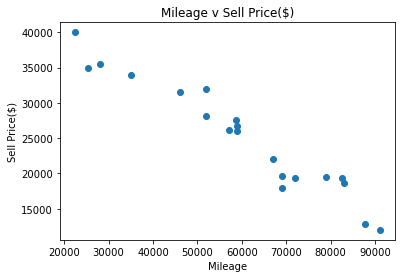

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Mileage'], df['Sell Price($)'])
plt.title('Mileage v Sell Price($)')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.show()           # Mileage v Sell price

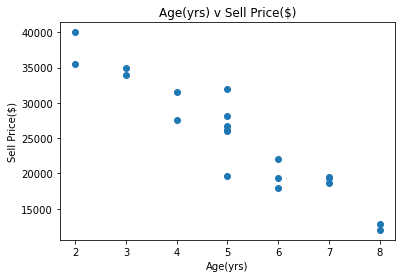

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])
plt.title('Age(yrs) v Sell Price($)')
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.show()          # Age v Sell price

In [93]:
X = df[['Mileage', 'Age(yrs)']]
y = df['Sell Price($)']

In [94]:
X.head()

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4


In [95]:
y.head()

0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell Price($), dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) 
# Train 80%, Test 20%
# use random_state argument to fix the train sample

In [97]:
len(X_train)

16

In [98]:
X_train        # random samples for train

,Mileage,Age(yrs)
9,67000,6
3,22500,2
15,25400,3
8,91000,8
5,59000,5
1,35000,3
14,82450,7
19,52000,5
18,87600,8
10,83000,7


In [99]:
len(X_test)

4

In [100]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [101]:
X_test

,Mileage,Age(yrs)
4,46000,4
11,79000,7
17,69000,5
13,58780,4


In [102]:
clf.predict(X_test)

array([30159.52488783, 17889.48966892, 22497.74325525, 26355.58995184])

In [103]:
y_test      #y_test values correspondind to predicted X_test values

4     31500
11    19500
17    19700
13    27500
Name: Sell Price($), dtype: int64

In [104]:
clf.score(X_test, y_test)

0.8724166864711835

## Logistic Regression

In [105]:
# y = mx + c, in case of Linear Regression
# y = 1/(1 + e^-z), where z = mx + c in case of Logistic Regression
# y = 1/(1 + e^-z) is known as Sigmoid function

In [106]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [107]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


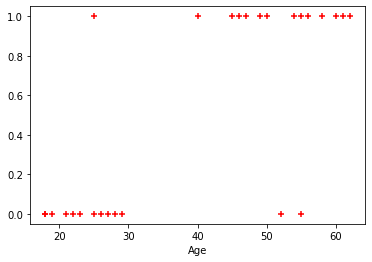

In [108]:
plt.scatter(df.age, df.bought_insurance, marker = '+', color = 'red')
plt.xlabel('Age')
plt.show()

In [109]:
df.shape

(27, 2)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.9)
# Train 90% and Test 10%

In [111]:
X_test

,age
0,22
21,26
19,18


In [112]:
X_train

,age
11,28
10,18
12,27
6,55
17,58
5,56
13,29
7,60
8,62
15,55


In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [114]:
X_test

,age
0,22
21,26
19,18


In [115]:
model.predict(X_test)

array([0, 0, 0], dtype=int64)

In [116]:
model.score(X_test, y_test)

1.0

In [117]:
model.predict_proba(X_test)     
# probability of buying insurance corresponding to X_test
# [not buying, buying]

array([[0.87882346, 0.12117654],
       [0.81491337, 0.18508663],
       [0.92275726, 0.07724274]])

In [118]:
# Exercise
# Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

# Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Now build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

In [119]:
import pandas as pd
df = pd.read_csv('HR_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [120]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [121]:
# Average number for all columns
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [122]:
# From above table we can draw following conclusions,

# **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
# **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
# **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

In [123]:
# Impact of salary on employee retention
v_sal = pd.crosstab(df.salary, df.left)
v_sal

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

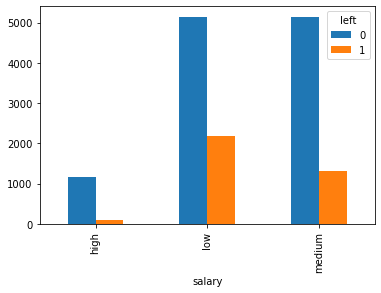

In [124]:
v_sal.plot(kind = 'bar')

In [125]:
# Above bar chart shows employees with high salaries are likely to not leave the company.

In [126]:
# Department wise employee retention rate
v_dept = pd.crosstab(df.Department, df.left)
v_dept

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

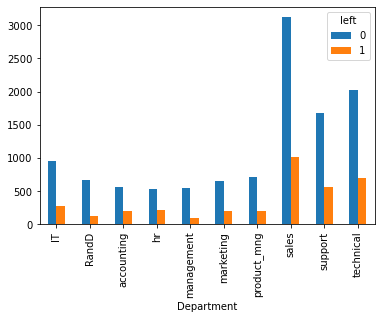

In [127]:
v_dept.plot(kind = 'bar')

In [128]:
# From above chart there seem to be some impact of department on employee retention.
# But it is not major hence we will ignore department in our analysis
# It is evident that employees of Sales Department are likely to leave the company.

In [129]:
# From the data analysis so far we can conclude that we will use following variables as independant variables in our model
# **Satisfaction Level**
# **Average Monthly Hours**
# **Promotion Last 5 Years**
# **Salary**

In [130]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [131]:
# Tackle salary dummy variable
# Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. 
# Check one hot encoding tutorial to understand purpose behind dummy variables.

In [132]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [133]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [134]:
# Now we need to remove salary column which is text data. 
# It is already replaced by dummy variables so we can safely remove it

df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [135]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [136]:
y = df.left

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [137]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [138]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
# Accuracy of the model
model.score(X_test,y_test)

0.7817142857142857

## Logistic Regression: Multiclass Classification

In [140]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 432x288 with 0 Axes>

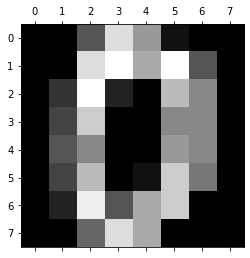

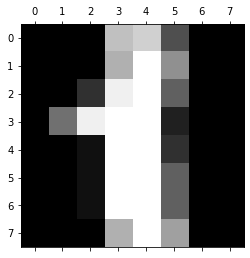

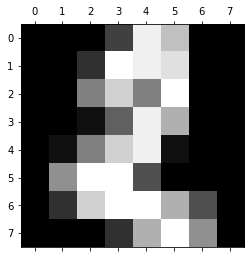

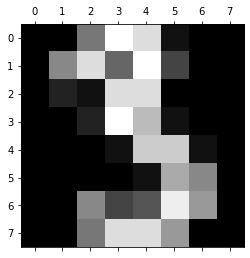

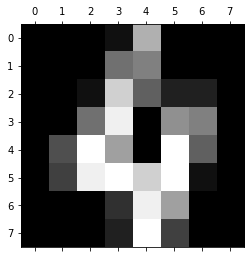

In [141]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [142]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [143]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [144]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [145]:
# Create and train logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size = 0.2)
model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
# Measure accuracy of our model
model.score(X_test, y_test)

0.95

In [147]:
model.predict(digits.data[0:5])     # It's a good model

array([0, 1, 2, 3, 4])

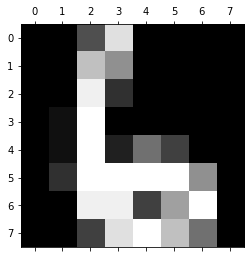

In [148]:
plt.matshow(digits.images[67])

In [149]:
digits.target[67]

6

In [150]:
model.predict([digits.data[67]])     # high accuarcy

array([6])

In [151]:
# We build a Confusion Matrix to check where our model lacks accuracy

y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[41,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0, 30,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 34,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  0],
       [ 0,  5,  0,  0,  1,  1,  0,  0, 34,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 37]], dtype=int64)

Text(69.0, 0.5, 'Truth')

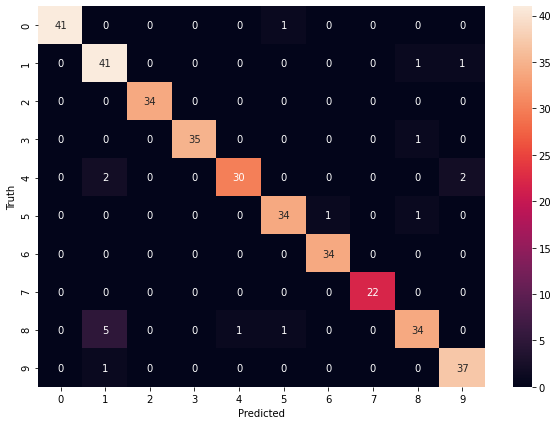

In [152]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [153]:
# The heatmap shows that along the diagonal, maximum correct predictions are made.
# Other than diagonal, the values other that zero shows wrong predictions.

In [154]:
# Exercise

# Use sklearn.datasets iris flower dataset to train your model using logistic regression. 
# You need to figure out accuracy of your model and use that to predict different samples in your test dataset. 
# In iris dataset there are 150 samples containing following features,
# Sepal Length
# Sepal Width
# Petal Length
# Petal Width

# Using above 4 features you will clasify a flower in one of the three categories,
# Setosa
# Versicolour
# Virginica

In [155]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.drop('Id',axis='columns',inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [156]:
# Average number for all columns
df.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


<AxesSubplot:xlabel='SepalLengthCm'>

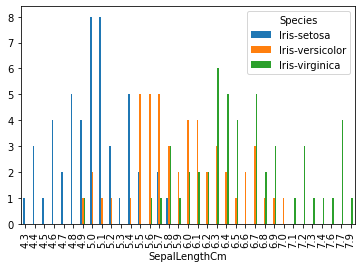

In [157]:
# Impact of SepalLength on Species
v_sepal_length = pd.crosstab(df.SepalLengthCm, df.Species)
v_sepal_length.plot(kind = 'bar')

<AxesSubplot:xlabel='SepalWidthCm'>

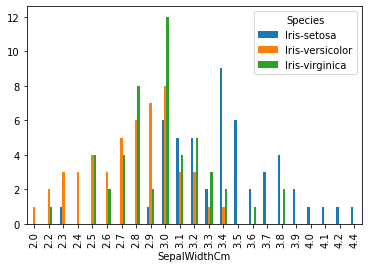

In [158]:
# Impact of SepalLength on Species
v_sepal_width = pd.crosstab(df.SepalWidthCm, df.Species)
v_sepal_width.plot(kind = 'bar')

<AxesSubplot:xlabel='PetalLengthCm'>

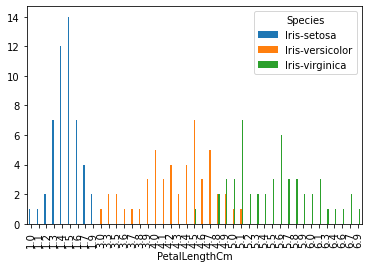

In [159]:
# Impact of PetalLength on Species
v_petal_length = pd.crosstab(df.PetalLengthCm, df.Species)
v_petal_length.plot(kind = 'bar')

<AxesSubplot:xlabel='PetalWidthCm'>

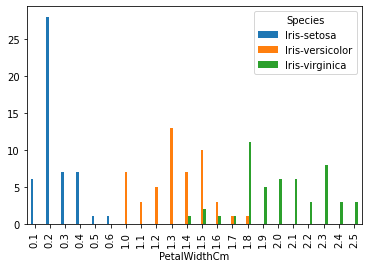

In [160]:
# Impact of PetalWength on Species
v_petal_width = pd.crosstab(df.PetalWidthCm, df.Species)
v_petal_width.plot(kind = 'bar')

In [161]:
# Thus, it is clearly evident how the species are related to their sepal length, sepal width, petal length and petal width.

In [162]:
# From the data analysis so far we can conclude that we will use following variables as independant variables in our model
# Sepal Length
# Sepal Width
# Petal Length
# Petal Width

In [163]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [164]:
# Create and train logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
model.fit(X_train, y_train)

LogisticRegression()

In [165]:
model.predict(X_test)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [166]:
model.predict([[7.0, 4.0, 3.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

In [167]:
model.score(X_train,y_train)

0.9809523809523809

In [168]:
# How accurate our model is!

y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[18,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 14]], dtype=int64)

Text(42.0, 0.5, 'Truth')

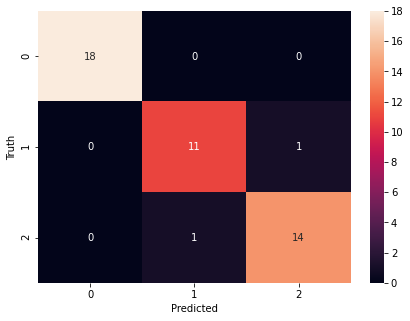

In [169]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')